<a href="https://colab.research.google.com/github/Ngechu40/Organizations/blob/main/Organizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()


Saving organizations-10000.csv to organizations-10000.csv


In [ ]:
import numpy as np#This library is used for working with arrays.
import pandas as pd#This library is used for working with data sets,used for analyzing, cleaning,exploring, and manipulating data.
import seaborn as sns#it is used for making statistical graphics.
import matplotlib.pyplot as plt#This library is used to visualize data.
df=pd.read_csv('organizations-10000.csv')
df


,Index,Organization Id,Name,Website,Country,Description,Founded,Industry,Number of employees
0,1,522816eF8fdBE6d,Mckinney PLC,http://soto.com/,Sri Lanka,Synergized global system engine,1988,Dairy,3930
1,2,70C7FBD7e6Aa3Ea,Cunningham LLC,http://harding-duffy.com/,Namibia,Team-oriented fault-tolerant adapter,2018,Library,7871
2,3,428B397eA2d7290,Ruiz-Walls,http://www.atkins.biz/,Iran,Re-contextualized bifurcated moderator,2003,Hospital / Health Care,3095
3,4,9D234Ae8Cc51C1c,"Parrish, Osborne and Clarke",http://salazar.info/,British Indian Ocean Territory (Chagos Archipe...,Fully-configurable next generation concept,1989,Supermarkets,5422
4,5,6CDCcdE3D0b7b44,"Diaz, Robles and Haley",https://www.brooks-scott.net/,Botswana,Inverse intangible methodology,2013,Nanotechnology,3135
...,...,...,...,...,...,...,...,...,...
9995,9996,2EE82AD1Cd045cd,"Neal, Day and Wang",https://carson.net/,San Marino,Team-oriented multimedia core,2013,Import / Export,6123
9996,9997,06f1568A2CaF04a,"Barrett, Rojas and Adkins",https://douglas-garza.com/,Turkmenistan,Cross-group dedicated methodology,2018,Human Resources / HR,9043
9997,9998,B4B92A44e0331Bc,Franklin-Ayala,http://www.torres.org/,Yemen,Polarized exuding orchestration,1983,Financial Services,8951
9998,9999,01D2539e270CEbd,Wolfe-Mckee,http://www.parks.com/,Togo,Balanced value-added ability,1975,Environmental Services,2505


In [ ]:
df.info()#prints information about a dataframe including the index dtype and columns, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Index                10000 non-null  int64 
 1   Organization Id      10000 non-null  object
 2   Name                 10000 non-null  object
 3   Website              10000 non-null  object
 4   Country              10000 non-null  object
 5   Description          10000 non-null  object
 6   Founded              10000 non-null  int64 
 7   Industry             10000 non-null  object
 8   Number of employees  10000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 703.2+ KB


In [ ]:
df.describe().T#returns description of the data in the Dataframe

,count,mean,std,min,25%,50%,75%,max
Index,10000.0,5000.5000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Founded,10000.0,1995.7767,14.991608,1970.0,1983.00,1996.0,2009.00,2022.0
Number of employees,10000.0,4961.3210,2911.862096,1.0,2446.75,4894.0,7530.00,9999.0


In [ ]:
df.columns

Index(['Index', 'Organization Id', 'Name', 'Website', 'Country', 'Description',
       'Founded', 'Industry', 'Number of employees'],
      dtype='object')

In [ ]:
df.shape

(10000, 9)

Data cleaning

In [ ]:
df.nunique()#returns the number of unique values for each column

Index                  10000
Organization Id        10000
Name                    9210
Website                 8298
Country                  243
Description             9952
Founded                   53
Industry                 147
Number of employees     6341
dtype: int64

In [ ]:
df.isnull().any()#indicates if any value is missing

Index                  False
Organization Id        False
Name                   False
Website                False
Country                False
Description            False
Founded                False
Industry               False
Number of employees    False
dtype: bool

<Axes: >

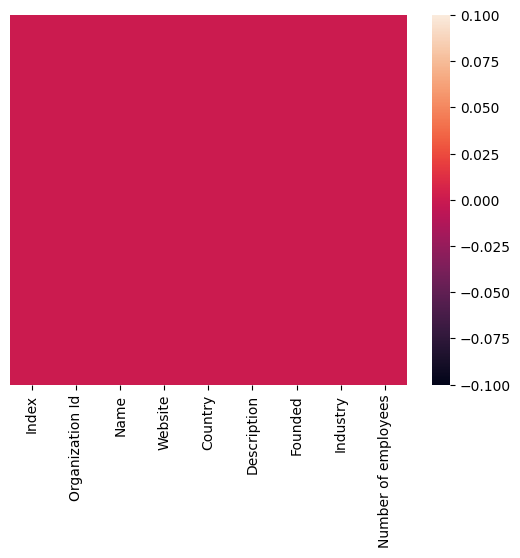

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False)#visualization of missing records in dataframe

**Data Visualization**

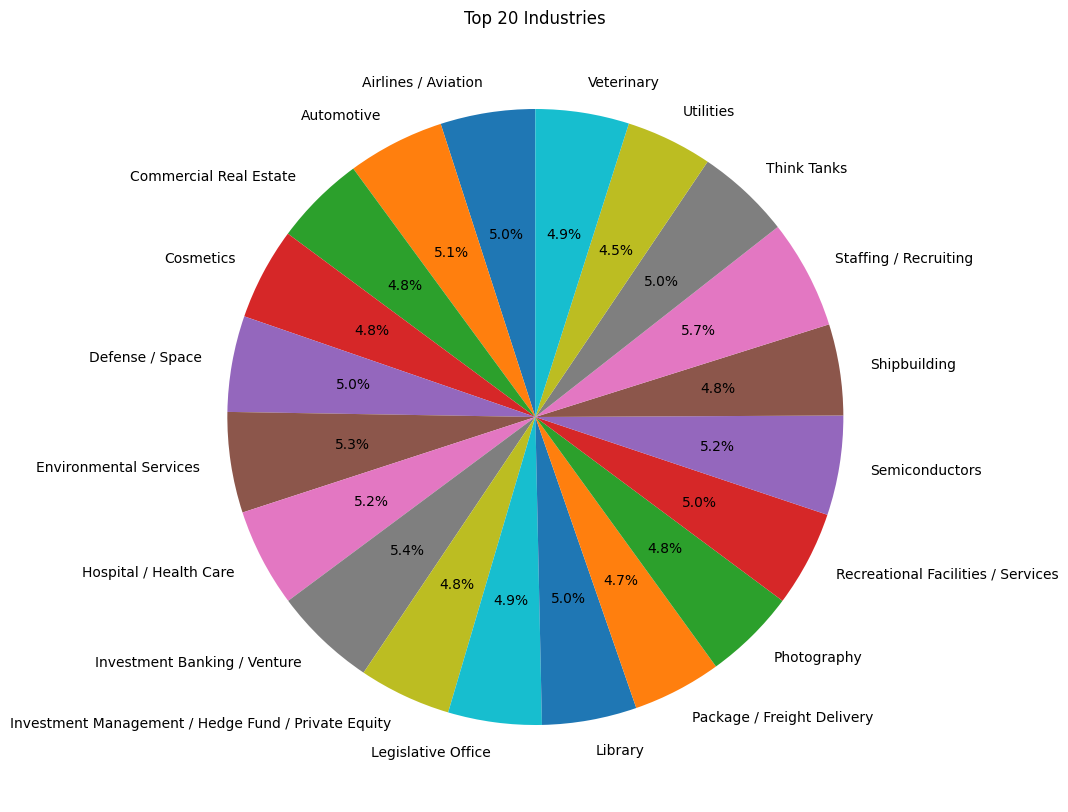

In [ ]:
industry_country = df.groupby(['Industry', 'Country']).size().reset_index(name='Count')

# Get the top 20 industries
top_industries = industry_country['Industry'].value_counts().nlargest(20).index

# Filter data for top industries
industry_country_top = industry_country[industry_country['Industry'].isin(top_industries)]

# Group by industry and sum counts
industry_counts = industry_country_top.groupby('Industry')['Count'].sum()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 20 Industries')
plt.show()


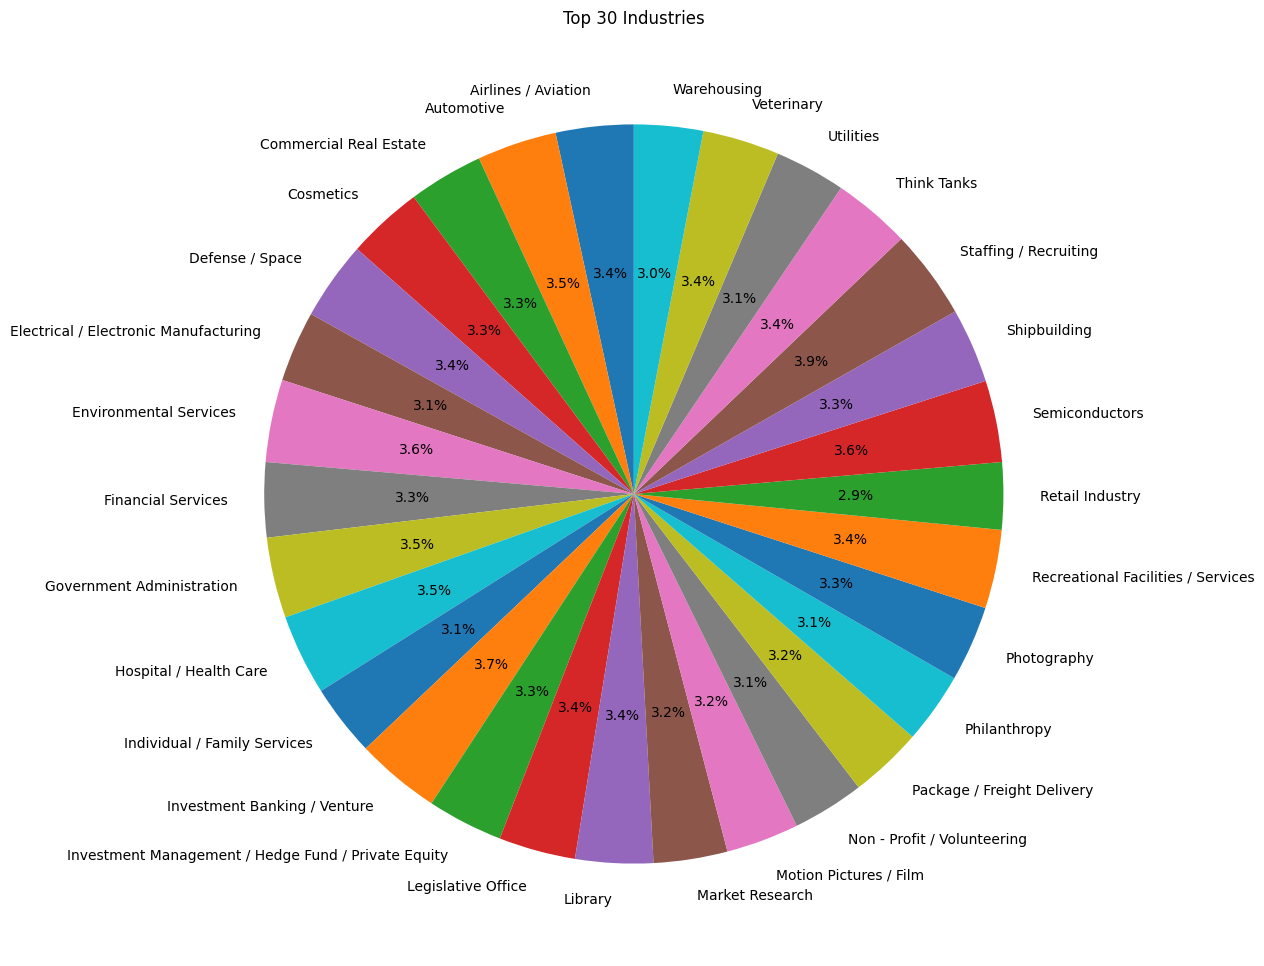

In [ ]:
# Get the top 30 industries
top_industries = industry_country['Industry'].value_counts().nlargest(30).index

# Filter data for top industries
industry_country_top = industry_country[industry_country['Industry'].isin(top_industries)]

# Group by industry and sum counts
industry_counts = industry_country_top.groupby('Industry')['Count'].sum()

# Create a pie chart
plt.figure(figsize=(12, 12))  # Adjust figure size for better visibility
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 30 Industries')
plt.show()


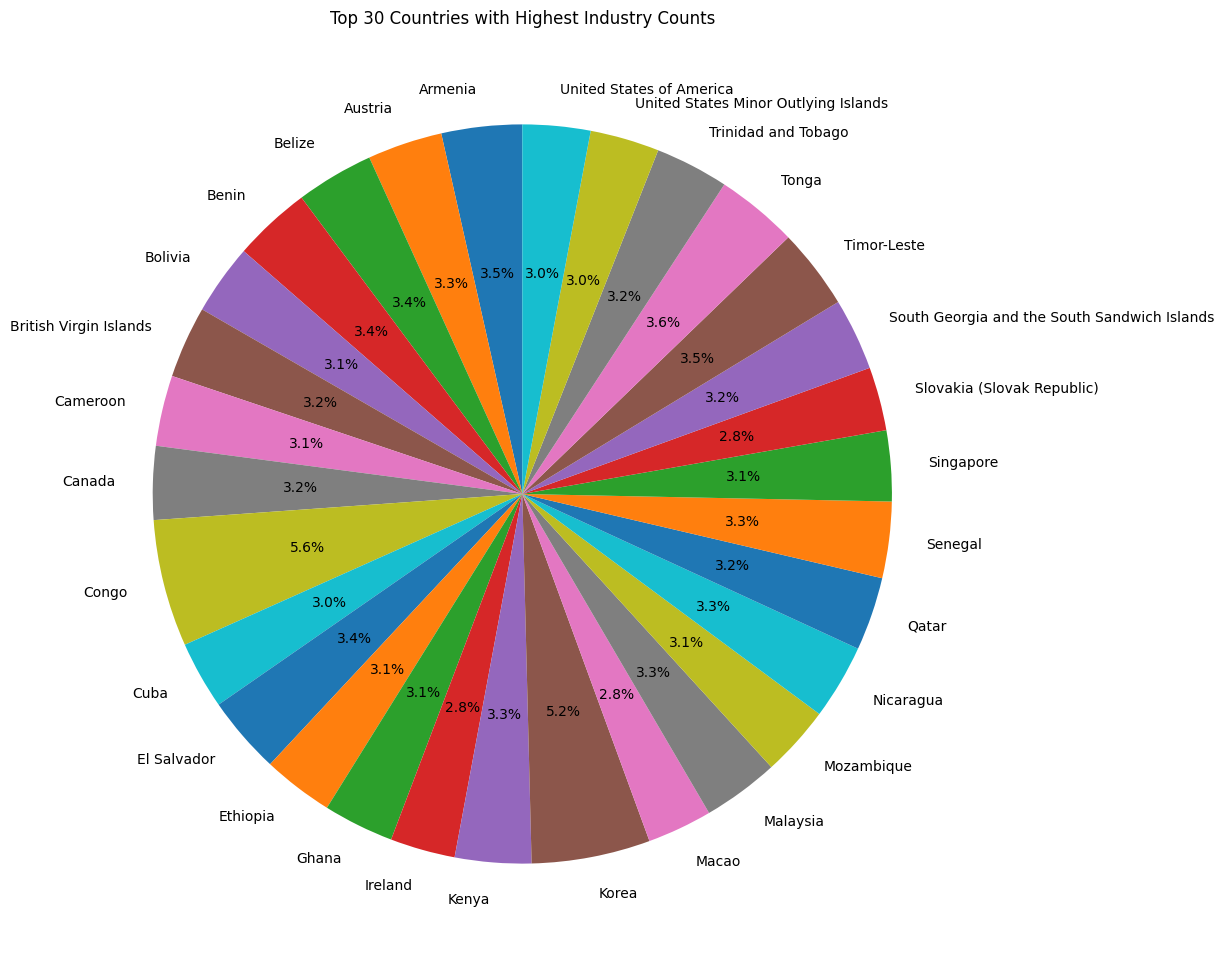

In [ ]:
# Get the top 30 countries with the highest industry counts
top_countries = industry_country['Country'].value_counts().nlargest(30).index

# Filter data for top countries
country_industry_top = industry_country[industry_country['Country'].isin(top_countries)]

# Group by country and sum counts
country_counts = country_industry_top.groupby('Country')['Count'].sum()

# Create a pie chart
plt.figure(figsize=(12, 12))  # Adjust figure size for better visibility
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 30 Countries with Highest Industry Counts')
plt.show()


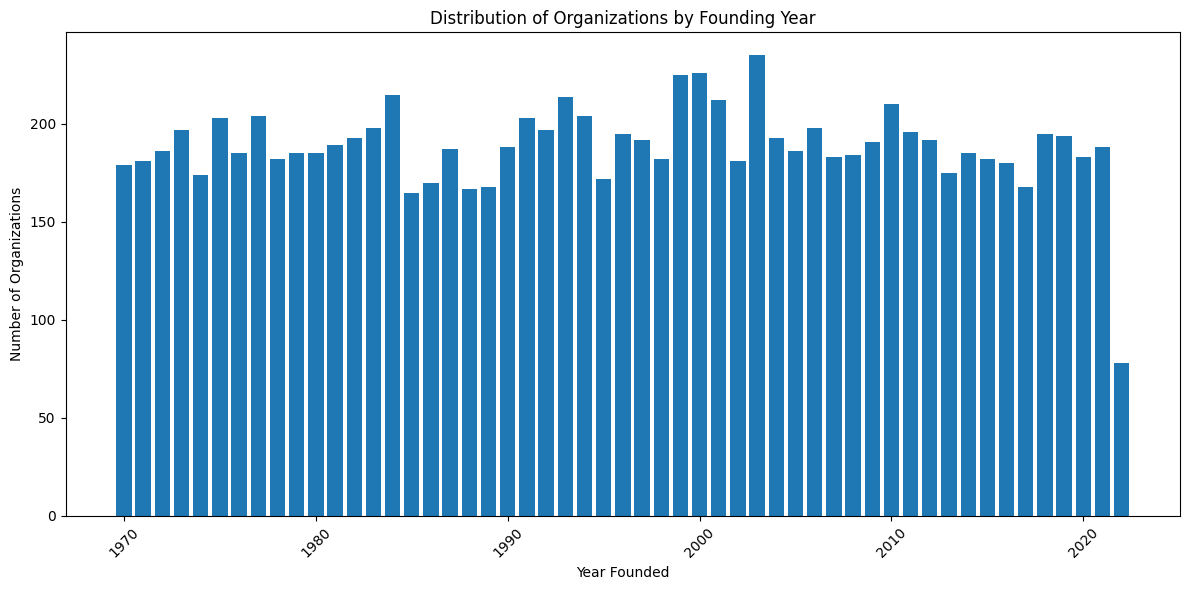

In [ ]:
import matplotlib.pyplot as plt
# Extract the 'Founded' year and count occurrences
founded_counts = df['Founded'].value_counts()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(founded_counts.index, founded_counts.values)
plt.xlabel('Year Founded')
plt.ylabel('Number of Organizations')
plt.title('Distribution of Organizations by Founding Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


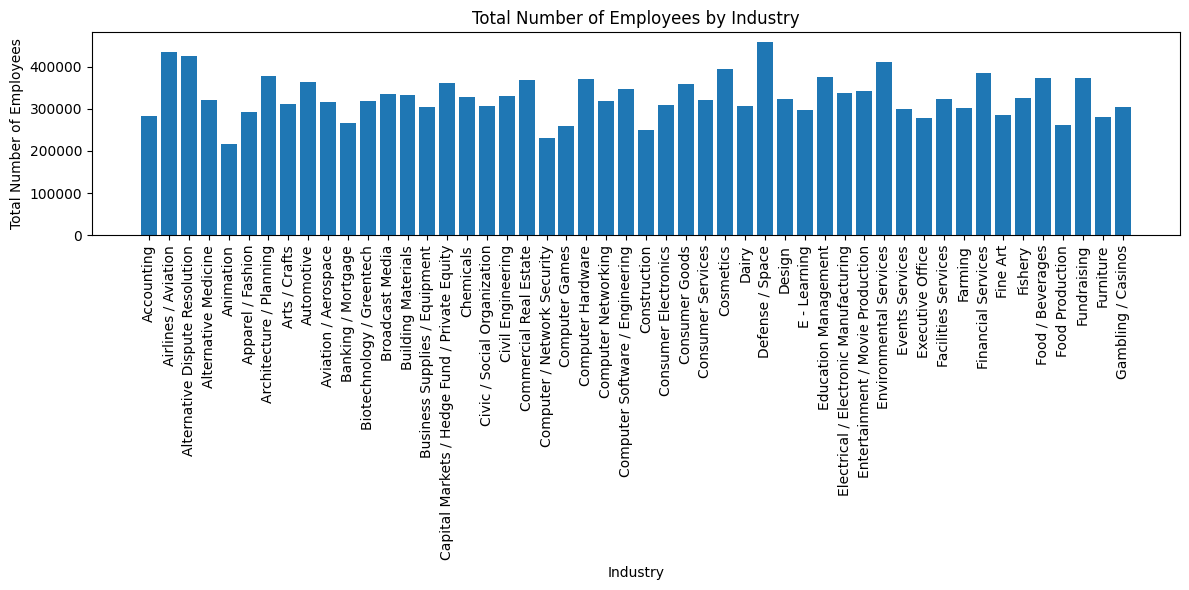

In [ ]:
employees_by_industry = df.groupby('Industry')['Number of employees'].sum().head(50)

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(employees_by_industry.index, employees_by_industry.values)
plt.xlabel('Industry')
plt.ylabel('Total Number of Employees')
plt.title('Total Number of Employees by Industry')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


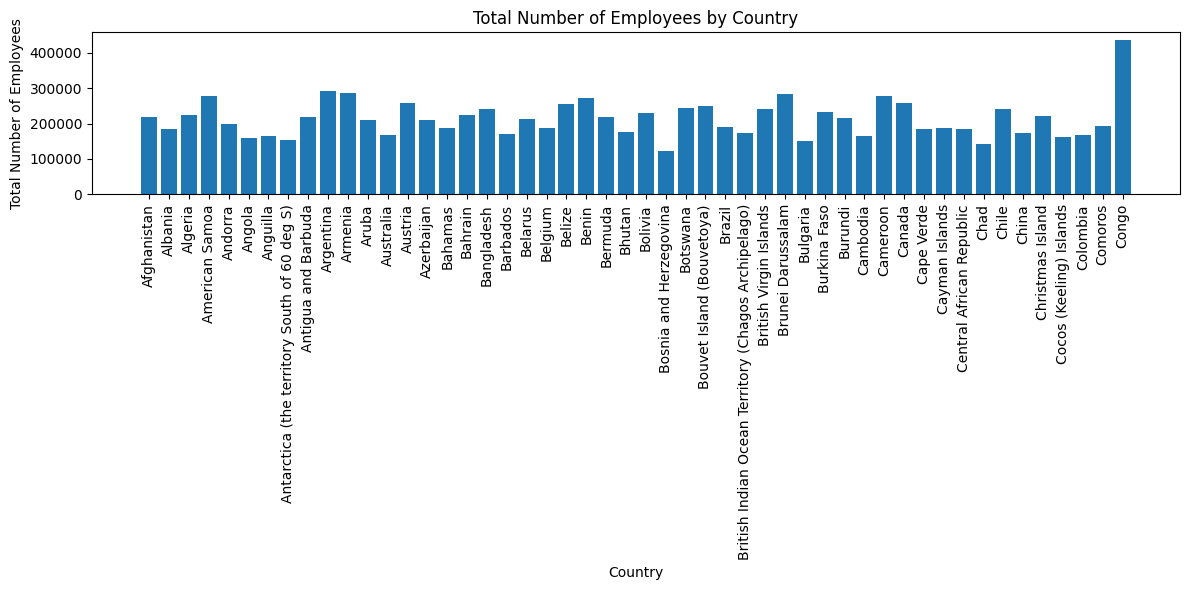

In [ ]:
employees_by_country = df.groupby('Country')['Number of employees'].sum().head(50)

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(employees_by_country.index, employees_by_country.values)
plt.xlabel('Country')
plt.ylabel('Total Number of Employees')
plt.title('Total Number of Employees by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()